# Doctor's Consultation Fees Prediction

Problem Statement

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

Size of training set: 5961 records

Size of test set: 1987 records

FEATURES

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
train_data=pd.read_csv("Final_Train.csv")
train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


we can see in dataset that our target vairable is fees and values are of continuous type, so this is a regression problem

In [3]:
train_data.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [5]:
train_data.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [6]:
train_data.shape

(5961, 7)

# Pre-processing

 we have to discard all the texts and put only the numeric value there

In [10]:
for i in train_data['Miscellaneous_Info'].value_counts().index:
    train_data['Miscellaneous_Info'].replace(i,int(1),inplace=True)
    train_data['Miscellaneous_Info'].fillna(int(0),inplace=True)
    

In [11]:
for i in train_data['Experience'].value_counts().index:
    ww=i.split()
    train_data['Experience'].replace(i,int(ww[0]),inplace=True)

In [17]:
for i in train_data['Rating'].value_counts().index:
    train_data['Rating'].replace(i,int(1),inplace=True)
    train_data['Rating'].fillna(int(0),inplace=True)
    

In [18]:
train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,1,"Kakkanad, Ernakulam",Homeopath,1,100
1,"BAMS, MD - Ayurveda Medicine",12,1,"Whitefield, Bangalore",Ayurveda,1,350
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,0,300
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,1,250
4,BAMS,20,1,"Keelkattalai, Chennai",Ayurveda,1,250


# Data Visualisations

In [19]:
train_data.isnull().sum()

Qualification          0
Experience             0
Rating                 0
Place                 25
Profile                0
Miscellaneous_Info     0
Fees                   0
dtype: int64

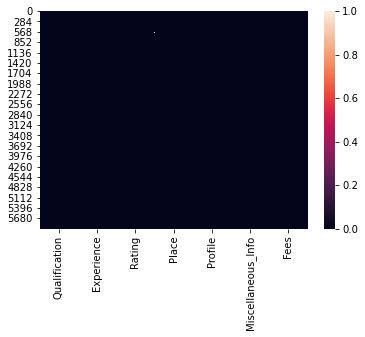

In [20]:
sns.heatmap(train_data.isnull())

we can see here there is no null values

In [21]:
train_data.drop('Place',inplace=True,axis=1)

In [22]:
train_data.isnull().sum()

Qualification         0
Experience            0
Rating                0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

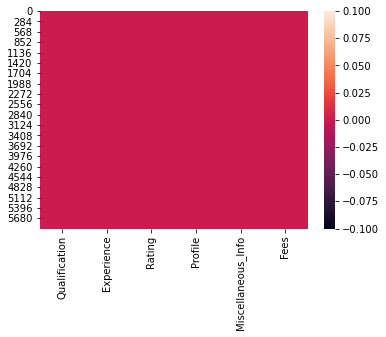

In [23]:
sns.heatmap(train_data.isnull())

now al null values are removed now


In [24]:
train_data.shape

(5961, 6)

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   int64 
 2   Rating              5961 non-null   int64 
 3   Profile             5961 non-null   object
 4   Miscellaneous_Info  5961 non-null   int64 
 5   Fees                5961 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 279.5+ KB


we see here there are 2 object type of categorical values that neends to be converted into numerical values

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Qualification','Profile']
for val in list1:
    train_data[val]=le.fit_transform(train_data[val].astype(str))

In [28]:
train_data.head(5)

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees
0,401,24,1,5,1,100
1,73,12,1,0,1,350
2,1135,9,0,3,0,300
3,464,12,0,0,1,250
4,10,20,1,0,1,250


In [29]:
train_data.describe()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,17.303976,0.446066,2.441872,0.560476,307.944640
std,413.842446,11.142798,0.497124,1.658014,0.496371,190.920373
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,219.000000,9.000000,0.000000,1.000000,0.000000,150.000000
50%,596.000000,14.000000,0.000000,2.000000,1.000000,300.000000
75%,943.000000,23.000000,1.000000,4.000000,1.000000,500.000000
max,1419.000000,66.000000,1.000000,5.000000,1.000000,950.000000


In [30]:
# Correlation value
train_data.corr()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees
Qualification,1.000000,0.134697,0.041777,0.393123,0.019150,0.263214
Experience,0.134697,1.000000,-0.019030,0.202073,-0.120359,0.002117
Rating,0.041777,-0.019030,1.000000,-0.114797,0.738906,0.164266
Profile,0.393123,0.202073,-0.114797,1.000000,-0.170498,0.145226
Miscellaneous_Info,0.019150,-0.120359,0.738906,-0.170498,1.000000,0.168466
Fees,0.263214,0.002117,0.164266,0.145226,0.168466,1.000000


# Exploratory Data Analysis

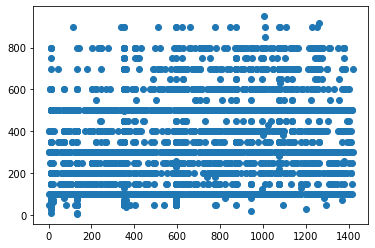

In [31]:
plt.scatter(train_data['Qualification'],train_data['Fees'])

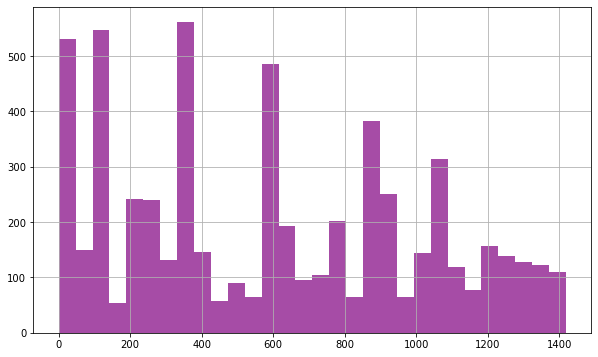

In [36]:
train_data['Qualification'].hist(bins=30,color='purple',alpha=0.7,figsize=(10,6))

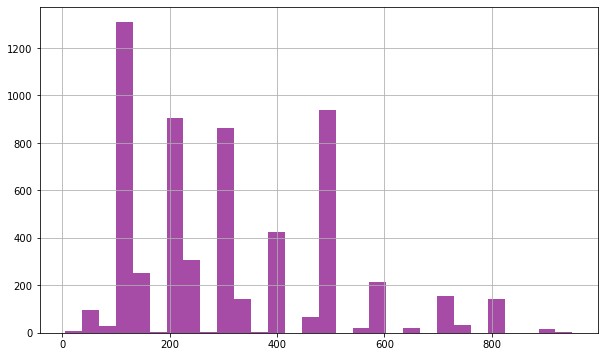

In [37]:
train_data['Fees'].hist(bins=30,color='purple',alpha=0.7,figsize=(10,6))

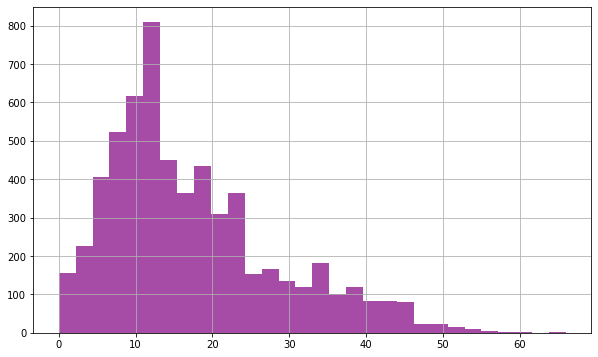

In [38]:
train_data['Experience'].hist(bins=30,color='purple',alpha=0.7,figsize=(10,6))

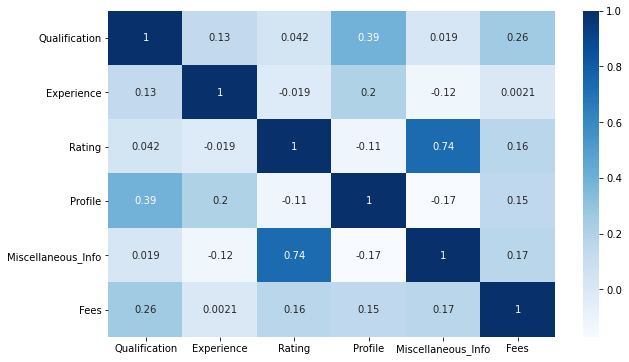

In [39]:
fig=plt.figure(figsize=(10,6))
ds=train_data.corr(method='pearson')
sns.heatmap(ds,annot=True,cmap='Blues')

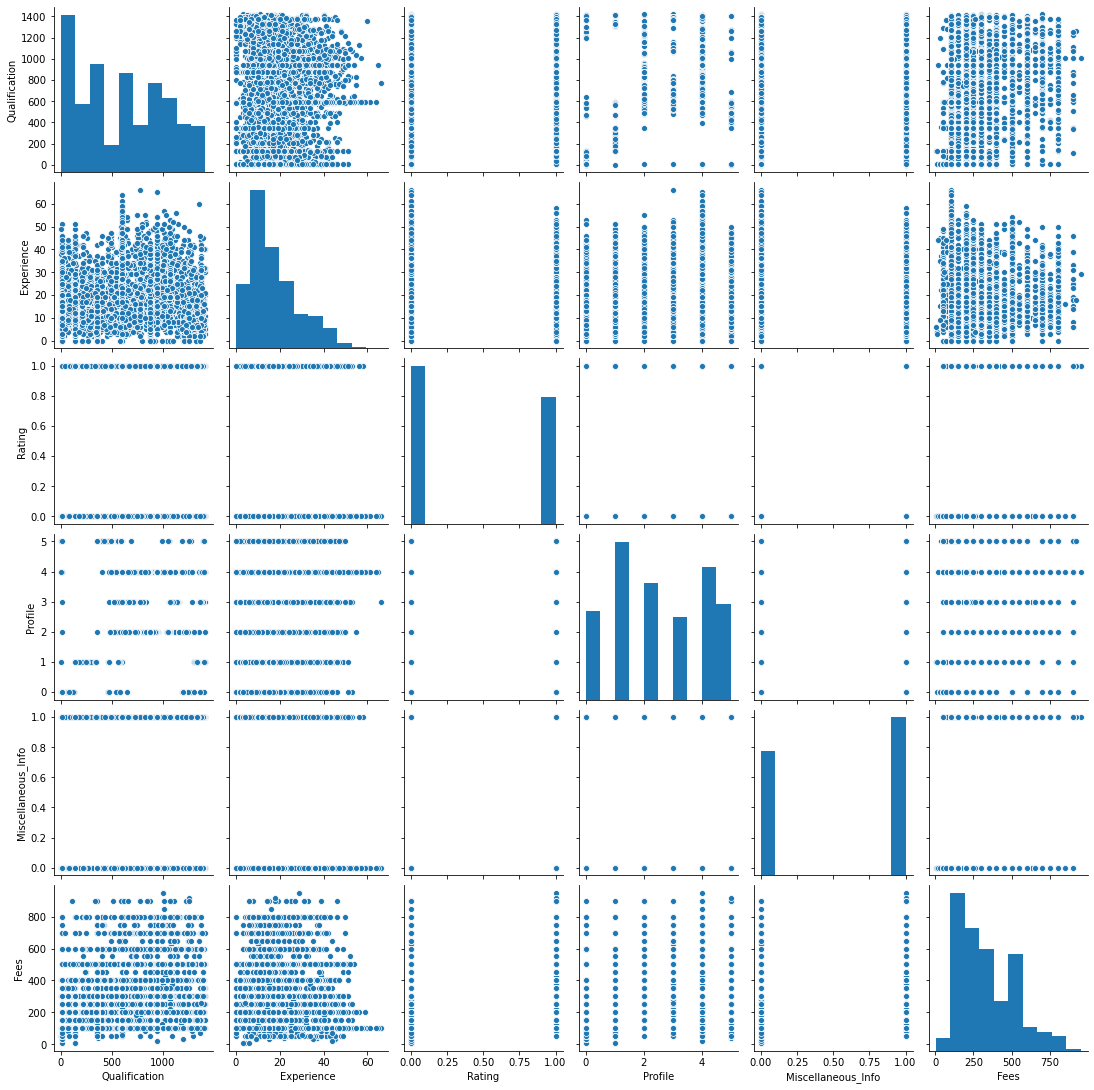

In [40]:
sns.pairplot(train_data)

# Data cleansing

checking ouliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1c2b7488af0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c2b788a460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c2b7488e80>],
 'medians': [<matplotlib.lines.Line2D at 0x1c2b788aca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c2b788adf0>],
 'means': []}

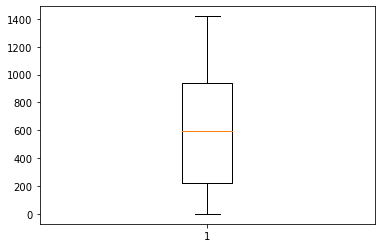

In [41]:
plt.boxplot(train_data.Qualification)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c2bc5a6ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c2bbc61400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c2bc5a63d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c2bbc61100>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c2bbc61f70>],
 'means': []}

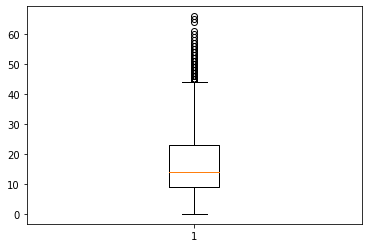

In [42]:
plt.boxplot(train_data.Experience)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c2b75256d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c2bd0bf8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c2b7525670>],
 'medians': [<matplotlib.lines.Line2D at 0x1c2bd0bfd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c2bd0bf220>],
 'means': []}

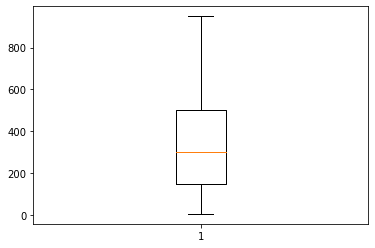

In [43]:
plt.boxplot(train_data.Fees)

we can see there is outliers present in experience so we have to remove that

In [44]:
from scipy.stats import zscore
zscr=np.abs(zscore(train_data))

threshold=3
print(np.where(zscr>3))


(array([ 105,  110,  183,  275,  293,  325,  372,  901,  987, 1009, 1111,
       1314, 1631, 1860, 1981, 2023, 2062, 2165, 2202, 2252, 2262, 2281,
       2393, 2428, 2522, 2623, 2631, 2708, 3180, 3365, 3478, 3493, 3608,
       3942, 3960, 4040, 4167, 4212, 4257, 4344, 4581, 4730, 4763, 4775,
       4835, 5195, 5250, 5265, 5277, 5311, 5410, 5422, 5587, 5637, 5664,
       5720, 5807, 5942], dtype=int64), array([1, 1, 1, 5, 5, 1, 1, 1, 5, 1, 1, 5, 5, 1, 1, 1, 1, 5, 1, 5, 1, 1,
       5, 5, 5, 5, 1, 5, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 5, 5, 1, 1,
       5, 5, 5, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))


In [45]:
zscr[105][1]

3.11402351621967

In [46]:
zscr[275][5]

3.1013192415345396

In [47]:
zscr[5942][1]

3.024271920990003

In [49]:
print("shape before removing the outliers:",train_data.shape)

train_datanew=train_data[(zscr<3).all(axis=1)]

print("shape after removing the outliers:",train_datanew.shape)

shape before removing the outliers: (5961, 6)
shape after removing the outliers: (5903, 6)


# Train Test Split

In [50]:
x=train_data.iloc[:,0:-1]
x.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info
0,401,24,1,5,1
1,73,12,1,0,1
2,1135,9,0,3,0
3,464,12,0,0,1
4,10,20,1,0,1


In [52]:
y=train_data.iloc[:,-1]
y.head()

0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=45)

In [54]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4589, 5)
(4589,)
(1372, 5)
(1372,)


# Model Building

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [57]:
LR=LinearRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(r2_score(y_test,predlr))
print(mean_squared_error(y_test,predlr))
print(mean_absolute_error(y_test,predlr))

0.09801466547675686
32464.245892467177
146.05483829497118


In [62]:
RF=RandomForestRegressor(random_state=0,criterion='mse')
RF.fit(x_train,y_train)
predrf=RF.predict(x_test)
print(r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))
print(mean_absolute_error(y_test,predrf))

0.0033091307960226857
35872.88641862166
147.31669876401276


In [59]:
AD=AdaBoostRegressor()
AD.fit(x_train,y_train)
predad=AD.predict(x_test)
print(r2_score(y_test,predad))
print(mean_squared_error(y_test,predad))
print(mean_absolute_error(y_test,predad))

0.10168867157159234
32332.011106924678
148.0895075738291


In [61]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
preddtr=DTR.predict(x_test)
print(r2_score(y_test,preddtr))
print(mean_squared_error(y_test,preddtr))
print(mean_absolute_error(y_test,preddtr))

-0.4037096596477736
50522.30209100194
167.6574328247069


# cross validation score

In [64]:
model=[LR,RF,AD,DTR]

for i in model:
    score=cross_val_score(i,x,y,cv=5)
    print(score)
    print(score.mean())
    print(score.std())

[0.10219492 0.10033977 0.10329004 0.09993619 0.10802022]
0.10275622884875397
0.0029017762295370907
[-0.06118458  0.01086615  0.06987019 -0.01103256  0.01013466]
0.003730771635778041
0.042186029723928875
[0.10678815 0.1104289  0.11695192 0.13006487 0.11252435]
0.11535163837742568
0.0080573010339641
[-0.41954712 -0.39806781 -0.38534861 -0.42555308 -0.45598439]
-0.4169002011253543
0.02432946394154395


LinearRegression has highest score so we go through with that for further process

# Hyper parameter tuning

In [65]:
from sklearn.model_selection import GridSearchCV


In [69]:
parameters ={'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False]}
GCV=GridSearchCV(LinearRegression(),parameters,cv=6)
GCV.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [70]:
GCV.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [71]:
GCV_pred=GCV.best_estimator_.predict(x_test)
r2_score(y_test,GCV_pred)

0.09801466547675686

# saving the model

In [73]:
import pickle
filename="LRdcotorfeesMODEL.pkl"
pickle.dump(LR,open(filename,'wb'))

# Using the test Dataset

In [74]:
test_df=pd.read_csv('Final_Test.csv')
test_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [75]:
test_df.shape

(1987, 6)

In [76]:
test_df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [77]:
test_df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [78]:
test_df.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [82]:
for i in test_df['Miscellaneous_Info'].value_counts().index:
    test_df['Miscellaneous_Info'].replace(i,int(1),inplace=True)
    test_df['Miscellaneous_Info'].fillna(int(0),inplace=True)
    
for i in test_df['Rating'].value_counts().index:
    test_df['Rating'].replace(i,int(1),inplace=True)
    test_df['Rating'].fillna(int(0),inplace=True)
    

In [83]:
test_df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 6
Profile               0
Miscellaneous_Info    0
dtype: int64

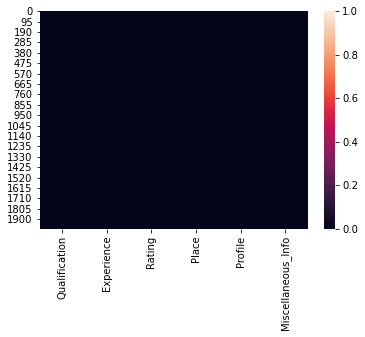

In [84]:
sns.heatmap(test_df.isnull())

here wecan see there is no null values

In [85]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              1987 non-null   int64 
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1987 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 93.3+ KB


In [86]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Qualification','Experience','Place','Profile']
for val in list1:
    test_df[val]=le.fit_transform(test_df[val].astype(str))

In [87]:
test_df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,241,28,0,142,4,0
1,340,24,0,580,3,0
2,258,34,1,212,2,1
3,6,0,0,374,0,0
4,79,7,1,231,1,1
...,...,...,...,...,...,...
1982,17,1,0,58,0,0
1983,548,33,0,96,2,0
1984,474,56,0,424,4,0
1985,51,3,1,26,1,1


In [88]:
test_df.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,259.979869,21.884248,0.451434,290.621540,2.508807,0.580272
std,185.961177,18.772896,0.497761,174.255446,1.654223,0.493639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.000000,6.000000,0.000000,138.500000,1.000000,0.000000
50%,241.000000,15.000000,0.000000,294.000000,2.000000,1.000000
75%,417.000000,35.000000,1.000000,441.000000,4.000000,1.000000
max,629.000000,56.000000,1.000000,592.000000,5.000000,1.000000


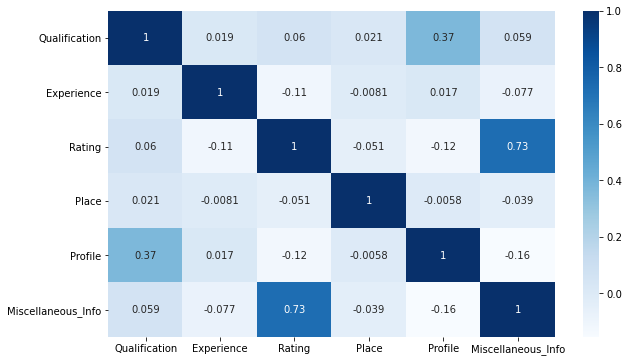

In [89]:
fig=plt.figure(figsize=(10,6))
ds=test_df.corr(method='pearson')
sns.heatmap(ds,annot=True,cmap='Blues')

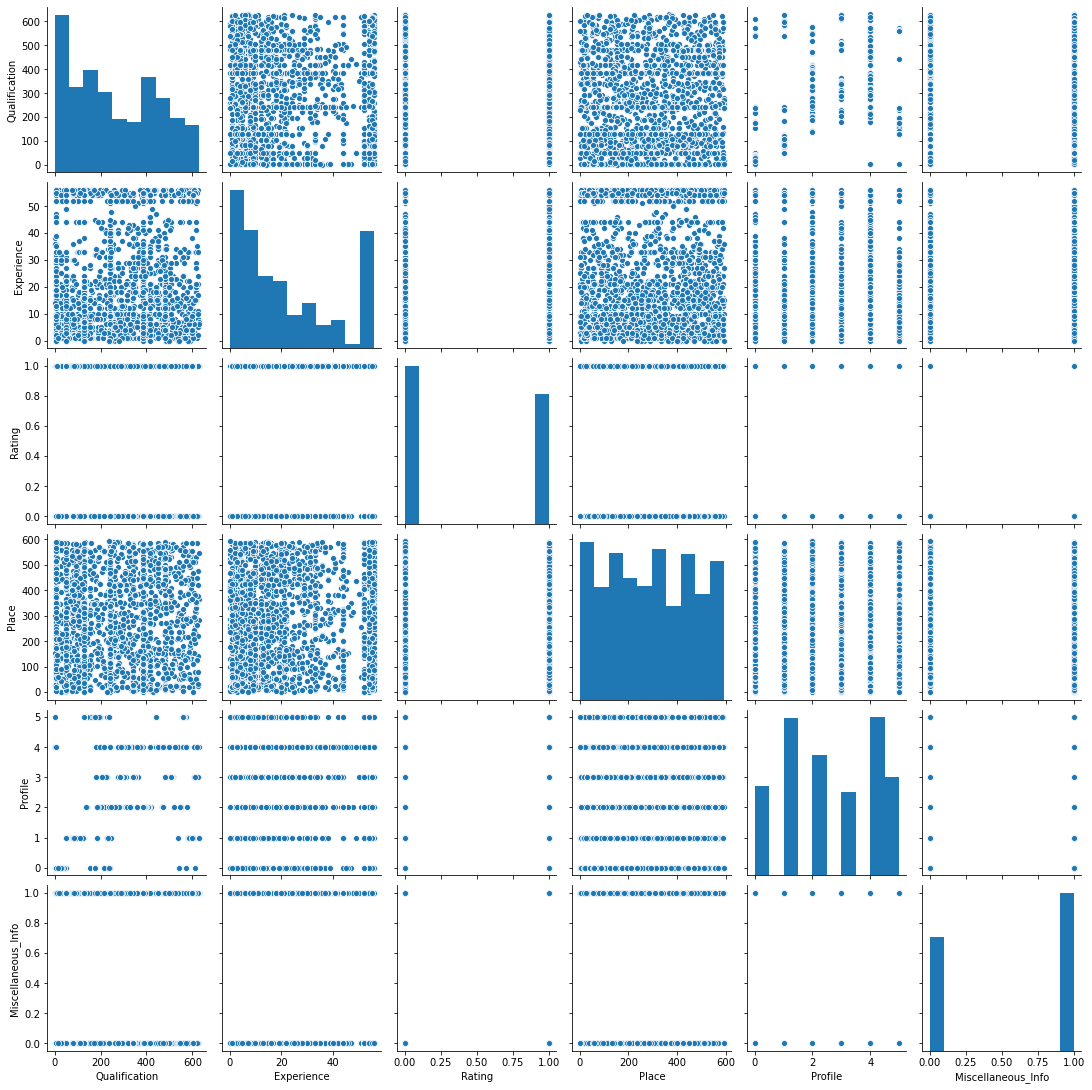

In [90]:
sns.pairplot(test_df)

# checking outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1c2bd37fe50>,
 'caps': [<matplotlib.lines.Line2D at 0x1c2bceb3f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c2bb432070>],
 'medians': [<matplotlib.lines.Line2D at 0x1c2b5c84100>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c2b7a30070>],
 'means': []}

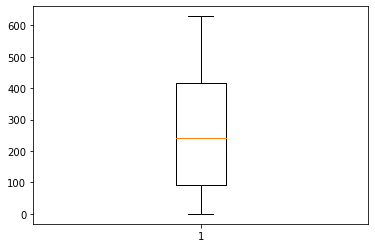

In [91]:
plt.boxplot(test_df.Qualification)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c2bd0ad100>,
 'caps': [<matplotlib.lines.Line2D at 0x1c2c0d67c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c2b74ebf70>],
 'medians': [<matplotlib.lines.Line2D at 0x1c2b5babb80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c2bebc3f10>],
 'means': []}

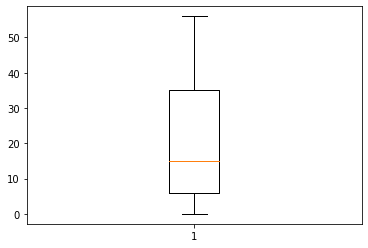

In [92]:
plt.boxplot(test_df.Experience)

we can see there is no outliers present

# Load the Model

In [94]:
fitted_model=pickle.load(open('LRdcotorfeesMODEL.pkl','rb'))

In [95]:
fitted_model

LinearRegression()